In [1]:
import numpy as np
import wandb
import optuna
from optuna.integration.wandb import WeightsAndBiasesCallback
import lightning as L
from lightning.pytorch.loggers import WandbLogger

from lightning_modules import Base_Model, Hinton_Distillation, All_Connections_Distillation
from cifar_dataset import cifar10_loader
from cifar_tiny import Cifar_Tiny
from cifar_very_tiny import Cifar_Very_Tiny

/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Данные

In [2]:
train_loader, test_loader = cifar10_loader(batch_size=128, maxsize=10112)

Files already downloaded and verified
Files already downloaded and verified


## Без Дистилляции

### Модель Tiny

In [3]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Tiny(10))
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: potapuch2001. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLos

Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 185.55it/s, v_num=69db]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 183.76it/s, v_num=69db]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/o4i569db/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/o4i569db/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 13.89it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1554526388645172
        AUC_Noise           0.35581153631210327
        test_acc            0.5888000130653381
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▃▅▅▆▆▆▇▇▇█████████████████████████████
train_loss,█▇▆▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.15545
AUC_Noise,0.35581
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 171.38it/s, v_num=vofw]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 169.62it/s, v_num=vofw]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/p9irvofw/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/p9irvofw/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.61it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16740526258945465
        AUC_Noise           0.3660525679588318
        test_acc            0.6074000000953674
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▄▅▆▅▆▆███████████████████████████████
train_loss,█▇▆▅▄▃▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.16741
AUC_Noise,0.36605
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 175.19it/s, v_num=j7ef]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 173.37it/s, v_num=j7ef]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/2pazj7ef/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/2pazj7ef/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.46it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16047368943691254
        AUC_Noise           0.3550063967704773
        test_acc            0.5929999947547913
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▅▅▆▆▆▇▇▆█████████████████████████████
train_loss,█▇▆▄▄▄▃▃▂▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.16047
AUC_Noise,0.35501
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 175.56it/s, v_num=fdjp]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 173.83it/s, v_num=fdjp]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/6xs0fdjp/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/6xs0fdjp/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.36it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17489999532699585
        AUC_Noise           0.3654717803001404
        test_acc             0.607200026512146
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▃▅▅▆▅▆▆█▇█████████████████████████████
train_loss,█▇▆▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1749
AUC_Noise,0.36547
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 168.09it/s, v_num=r65b]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 166.41it/s, v_num=r65b]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ty8fr65b/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ty8fr65b/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.46it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16065789759159088
        AUC_Noise           0.37256667017936707
        test_acc            0.5934000015258789
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▅▅▆▆▆▆▇▇█████████████████████████████
train_loss,█▇▆▄▄▄▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.16066
AUC_Noise,0.37257
distillation_type,without


### Модель VeryTiny

In [4]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Very_Tiny(10))
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 177.18it/s, v_num=1oqf]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 175.52it/s, v_num=1oqf]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/jm7w1oqf/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/jm7w1oqf/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.90it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.14324736595153809
        AUC_Noise           0.4344487190246582
        test_acc            0.5281999707221985
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▄▄▃▅▄▅▄▅▅▆▆▆▆▆▆▆▇▇▆▇▇▆▆▇▇▇▇▇▇██▇▇█████
train_loss,█▇▆▆▅▄▅▄▄▃▄▄▃▃▃▃▃▃▂▂▃▂▂▃▃▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.14325
AUC_Noise,0.43445
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 173.30it/s, v_num=lbmu]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 171.80it/s, v_num=lbmu]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/vg56lbmu/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/vg56lbmu/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.99it/s]  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.11100263148546219
        AUC_Noise           0.4324948787689209
        test_acc            0.5238000154495239
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▄▄▅▅▅▄▆▆▅▆▆▆▆▆▆▇▇▆▇▆▇▇▆▇▇▇▇██▇▇▇▇▇███
train_loss,█▇▆▅▅▄▅▄▅▄▄▄▄▃▄▃▃▃▂▂▃▂▃▂▂▃▂▂▂▂▁▁▂▂▁▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.111
AUC_Noise,0.43249
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 174.17it/s, v_num=nb50]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 172.61it/s, v_num=nb50]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/5qptnb50/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/5qptnb50/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.83it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.13246051967144012
        AUC_Noise           0.4277166724205017
        test_acc            0.5192999839782715
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▃▄▄▅▅▅▅▅▅▅▆▅▆▆▇▆▇▇▇▇▇▆▇▇▇██▇█▇█▆▇█████
train_loss,█▇▆▆▅▅▅▅▅▄▄▃▄▄▃▃▃▃▂▂▃▂▂▃▂▂▂▂▂▂▂▂▁▃▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.13246
AUC_Noise,0.42772
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 163.77it/s, v_num=o6jx]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 162.33it/s, v_num=o6jx]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/071vo6jx/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/071vo6jx/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.50it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.12091579288244247
        AUC_Noise           0.42213332653045654
        test_acc            0.4945000112056732
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▂▄▃▄▃▅▃▄▄▅▅▅▅▆▆▆▆▆▆▇▇▆▆▄▆▇▇▇▇█▇▇█▇▇▇██
train_loss,█▆▆▅▅▄▅▄▅▄▄▄▄▃▃▃▃▃▂▂▄▂▂▂▂▅▂▂▂▂▂▁▂▂▁▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.12092
AUC_Noise,0.42213
distillation_type,without


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 173.30it/s, v_num=seh0]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 171.78it/s, v_num=seh0]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/wof2seh0/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/wof2seh0/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.81it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.13709473609924316
        AUC_Noise           0.4284166693687439
        test_acc            0.5181000232696533
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▂▃▄▄▄▄▄▅▅▅▅▆▅▅▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇█▅█▇████
train_loss,█▇▆▅▆▅▅▅▄▄▄▄▃▃▄▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▄▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.13709
AUC_Noise,0.42842
distillation_type,without


## Дистиляция Хинтона
Из Tiny в VeryTiny

In [5]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "hinton",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = Hinton_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher)
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s] 

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 150.42it/s, v_num=8qfv]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 148.76it/s, v_num=8qfv]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/fmw68qfv/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/fmw68qfv/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.57it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▄▄▅▆▆▆▆▆▆▆▆▇▇▇▆▇▇▇██▇▇▇▇▇█▇█▇▇██▇██▁▁▁▁▁
train_loss,█▆▅▄▄▃▄▃▄▃▃▂▂▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,hinton


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   6%|▋         | 5/79 [00:00<00:01, 73.71it/s, v_num=aq7o]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 152.18it/s, v_num=aq7o]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 150.42it/s, v_num=aq7o]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/6sjtaq7o/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/6sjtaq7o/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.62it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▄▄▅▆▅▆▆▆▆▇▆▆▆▇▇█▇▇▇▇▇▇▇▇█▇█▇█▇████████▁▁
train_loss,█▆▅▄▄▄▄▃▃▃▃▃▃▂▃▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,hinton


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   5%|▌         | 4/79 [00:00<00:01, 63.15it/s, v_num=q2e2]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 146.18it/s, v_num=q2e2]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 144.72it/s, v_num=q2e2]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/2ajbq2e2/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/2ajbq2e2/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.59it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▄▄▅▅▅▆▆▇▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇██▇██▇█▇▇███▁▁▁▁
train_loss,█▆▅▄▄▃▄▃▃▃▃▃▂▂▃▂▂▃▂▂▂▂▂▂▁▂▂▁▁▂▁▁▂▁▂▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,hinton


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   6%|▋         | 5/79 [00:00<00:00, 74.10it/s, v_num=an5a]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 145.35it/s, v_num=an5a]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 143.49it/s, v_num=an5a]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/asd5an5a/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/asd5an5a/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.99it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▄▄▅▅▅▆▅▇▆▆▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇██▇██████▁▁▁▁
train_loss,█▆▆▅▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▂▂▂▂▁▂▁▁▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,hinton


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 0:   8%|▊         | 6/79 [00:00<00:00, 87.35it/s, v_num=ewd8]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 143.78it/s, v_num=ewd8]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:00<00:00, 141.96it/s, v_num=ewd8]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/0j8jewd8/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/0j8jewd8/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.29it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19915525615215302
        AUC_Noise           0.4890102446079254
        test_acc            0.5580999851226807
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▄▃▅▄▅▄▆▅▆▅▆▅▇▆▆█▇▆▇▇▆▇▇▇█▇▇█▇▇█▇▇▇███
train_loss,█▆▅▄▄▃▃▃▃▃▃▂▂▃▃▂▂▂▁▂▂▁▁▂▂▂▂▁▁▂▁▁▁▁▂▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.19916
AUC_Noise,0.48901
distillation_type,hinton


## Дистилляция междуслойная

In [6]:
coeffs_one_to_one = [1, 0, 0, 0,
                     0, 1, 0, 0,
                     0, 0, 1, 0,
                     0, 0, 0, 1]
coeffs_all_to_one = [0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0]
coeffs_all_to_all = [1/4.0 for _ in range(16)]

def random_coeffs():
    coeffs = np.random.rand(16)
    coeffs = coeffs * 4 / sum(coeffs)
    return list(coeffs)

### По схеме "один к одному"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.24it/s, v_num=m022]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.10it/s, v_num=m022]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/yenom022/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/yenom022/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.02it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,one_to_one
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.15it/s, v_num=kq2k]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.00it/s, v_num=kq2k]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/rudokq2k/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/rudokq2k/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.88it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,one_to_one
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 38.88it/s, v_num=45ng]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 38.70it/s, v_num=45ng]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/bntw45ng/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/bntw45ng/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.06it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,one_to_one
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 34.60it/s, v_num=zlzh]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 34.44it/s, v_num=zlzh]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/bmmvzlzh/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/bmmvzlzh/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.85it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,one_to_one
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.77it/s, v_num=002s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.66it/s, v_num=002s]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/r3ae002s/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/r3ae002s/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.39it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,one_to_one
epoch,100


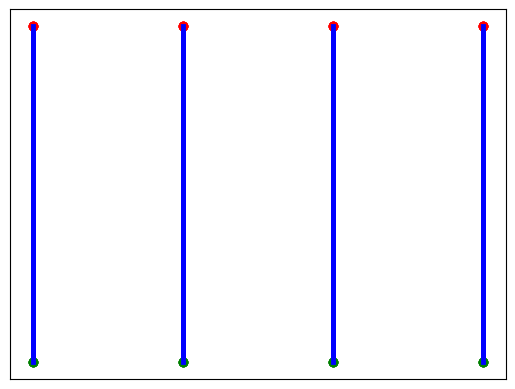

In [7]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "one_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_one_to_one)
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### По схеме "все со всеми"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.87it/s, v_num=x56x]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.77it/s, v_num=x56x]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/e7ybx56x/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/e7ybx56x/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.69it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.24321578443050385
        AUC_Noise           0.4049217998981476
        test_acc            0.5029000043869019
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▁▃▄▃▅▄▅▅▄▄▄▅▅▅▆▆▅▆▇▆▆▅▇▇▇▆▇▆▆▇▇▇▇▇▆▇██▇
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24322
AUC_Noise,0.40492
distillation_type,all_to_all


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:01<00:00, 43.66it/s, v_num=nfzg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:01<00:00, 43.53it/s, v_num=nfzg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/rllqnfzg/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/rllqnfzg/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.79it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2605000138282776
        AUC_Noise           0.37959229946136475
        test_acc            0.4724999964237213
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▁▁▁▁▃▂▃▃▃▃▃▅▄▄▅▅▅▅▆▅▆▅▆▆▇▆▆▇██▆▆▇▆▅▇▆▇▇
train_loss,█▅▄▃▃▃▂▃▂▂▂▂▂▂▂▁▂▂▁▁▂▂▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.2605
AUC_Noise,0.37959
distillation_type,all_to_all


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.40it/s, v_num=axny]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.32it/s, v_num=axny]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/20fdaxny/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/20fdaxny/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.13it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2545868456363678
        AUC_Noise            0.313973069190979
        test_acc            0.4000999927520752
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▂▃▁▁▂▁▁▁▂▃▃▃▃▃▄▂▂▃▃▄▄▅▅▆▆▆▅▄▄▅▆▄▄▇▄▄█▆█▇
train_loss,█▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25459
AUC_Noise,0.31397
distillation_type,all_to_all


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.07it/s, v_num=s2fn]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.96it/s, v_num=s2fn]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/wkbws2fn/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/wkbws2fn/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.56it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.24938157200813293
        AUC_Noise           0.37978076934814453
        test_acc            0.46869999170303345
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▂▁▂▄▄▄▄▆▅▄▄▅▅▄▅▆▆▅▅▇▅▆▆▇▇▇▇▆▇▇▇▇█▇█▆▇▇█▇
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24938
AUC_Noise,0.37978
distillation_type,all_to_all


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.85it/s, v_num=ov4d]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.72it/s, v_num=ov4d]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/gznaov4d/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/gznaov4d/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.39it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.25830525159835815
        AUC_Noise           0.39672309160232544
        test_acc            0.4878000020980835
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▁▃▄▃▅▃▄▅▅▄▅▄▄▅▆▅▅▆▇▅▇▅▆▇▇▇▇▇▇█▇▇▇▇▅▆▇█▇
train_loss,█▄▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25831
AUC_Noise,0.39672
distillation_type,all_to_all


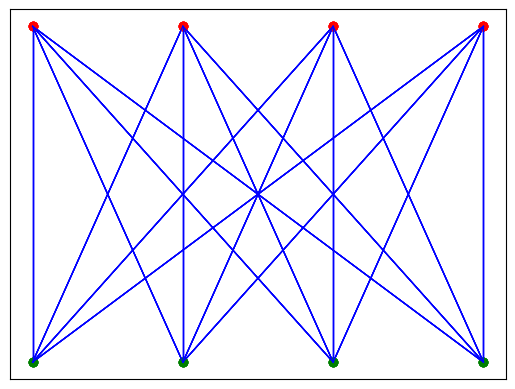

In [8]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_all",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_all)
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### По схеме "все к одному" (к наибольшему слою учителя)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.21it/s, v_num=iuz0]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.07it/s, v_num=iuz0]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/6s6aiuz0/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/6s6aiuz0/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.04it/s]  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2470710575580597
        AUC_Noise           0.48882564902305603
        test_acc            0.5827999711036682
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▄▄▆▅█▅▇▇▅▆▇█▇▇█▇▇▇▇▆▇▇▇█▇▅▇▇▇█▇▇▇▇▅▇██▇
train_loss,█▅▄▃▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▁▂▂▁▂▁▁▁▁▁▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24707
AUC_Noise,0.48883
distillation_type,all_to_one


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.51it/s, v_num=upyr]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.40it/s, v_num=upyr]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/4kwwupyr/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/4kwwupyr/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.90it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2396526336669922
        AUC_Noise           0.4638064205646515
        test_acc            0.5764999985694885
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▄▄▅▄▅▅▇▄▆▅▆▇▆▆▇▆▆▇▇▅▆▇▆▇▇▅▇█▆▇▇▆█▆▆▆▇█▇
train_loss,█▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▁▂▂▂▁▁▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23965
AUC_Noise,0.46381
distillation_type,all_to_one


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.97it/s, v_num=qw8k]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.88it/s, v_num=qw8k]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/z684qw8k/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/z684qw8k/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.55it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2485184222459793
        AUC_Noise           0.48190897703170776
        test_acc            0.5929999947547913
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▂▅▄▆▅▆▅▅▅▅▆▆▆▇▆▆▇▇▆▇▅▆█▇▃▆▅▆▇▆▆▇▅▄▆▇█▇
train_loss,█▅▄▃▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24852
AUC_Noise,0.48191
distillation_type,all_to_one


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.50it/s, v_num=ubh9]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.38it/s, v_num=ubh9]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/wj56ubh9/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/wj56ubh9/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.80it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.24743683636188507
        AUC_Noise           0.47609615325927734
        test_acc            0.5745000243186951
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▄▆▅▆▅▆▅▅▅▇▆▆▆█▆▆▆▆▅▆▇▆▇▇▅▆▇▆█▆▇█▆▄▇▅▇▆
train_loss,█▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24744
AUC_Noise,0.4761
distillation_type,all_to_one


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.67it/s, v_num=wsln]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.56it/s, v_num=wsln]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/yaz0wsln/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/yaz0wsln/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.03it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.23160000145435333
        AUC_Noise           0.47339871525764465
        test_acc            0.5735999941825867
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▄▆▄█▅▆▅▄▆▇▆▆▆█▅▆▇▇▅▅▆▅▇▇▅▇▆▆▇▆▆▇▅▅▇▇█▆
train_loss,█▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.2316
AUC_Noise,0.4734
distillation_type,all_to_one


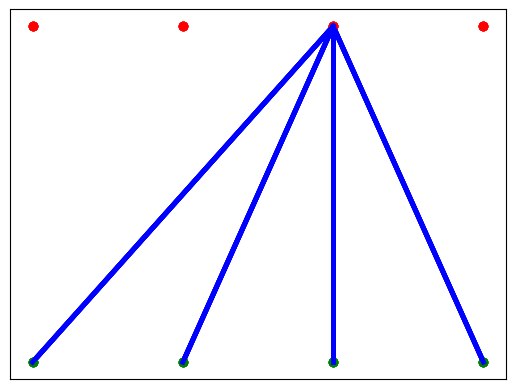

In [9]:
for _ in range(5):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_one)
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### Со случайными коэффициентами

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.73it/s, v_num=ynd1]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.54it/s, v_num=ynd1]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/0rptynd1/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/0rptynd1/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.83it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.93it/s, v_num=4k5g]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.80it/s, v_num=4k5g]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/uwpr4k5g/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/uwpr4k5g/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.03it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.23it/s, v_num=z1tg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.12it/s, v_num=z1tg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/6ro0z1tg/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/6ro0z1tg/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.97it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.19it/s, v_num=ung8]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.97it/s, v_num=ung8]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ajj1ung8/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ajj1ung8/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.98it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.03it/s, v_num=99co]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.92it/s, v_num=99co]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/a07p99co/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/a07p99co/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 15.82it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.20it/s, v_num=xpip]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.07it/s, v_num=xpip]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/dkqdxpip/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/dkqdxpip/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.28it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.10it/s, v_num=ab2a]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.98it/s, v_num=ab2a]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/7ftzab2a/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/7ftzab2a/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.65it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.25154998898506165
        AUC_Noise           0.4164128303527832
        test_acc            0.5188999772071838
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▃▄▄▅▄▅▄▄▅▅▆▅▆▅▅▅▆▆▅▅▅▅▆▇▆▆▇▅▇▇▆▇▇▆▇▆█▆
train_loss,█▆▅▄▄▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25155
AUC_Noise,0.41641
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.67it/s, v_num=rqog]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.53it/s, v_num=rqog]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/imocrqog/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/imocrqog/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.43it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.35it/s, v_num=9npt]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 33.25it/s, v_num=9npt]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/7b499npt/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/7b499npt/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.41it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.0997026339173317
        AUC_Noise           0.0995243564248085
        test_acc            0.0997999981045723
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▃▄▄▄▃▅▆▃▄▃▂▄▆▃▃▂▃▆▂▆▂▂▂▆█▂▃▃▁▃▃▂▃▁▂▃▅▃▃▇
train_loss,█▄▃▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▂▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.0997
AUC_Noise,0.09952
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.01it/s, v_num=7i4q]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.88it/s, v_num=7i4q]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/12pa7i4q/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/12pa7i4q/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.89it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.97it/s, v_num=c8zz]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.86it/s, v_num=c8zz]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/gm2zc8zz/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/gm2zc8zz/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.71it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.27it/s, v_num=ei7x]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.16it/s, v_num=ei7x]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/8nsmei7x/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/8nsmei7x/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.01it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.45it/s, v_num=humg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.37it/s, v_num=humg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/gq64humg/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/gq64humg/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.86it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.42it/s, v_num=aq5e]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.22it/s, v_num=aq5e]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/u9rqaq5e/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/u9rqaq5e/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.94it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.48it/s, v_num=raz2]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.37it/s, v_num=raz2]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/btdzraz2/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/btdzraz2/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.61it/s]  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.82it/s, v_num=qfv6]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.69it/s, v_num=qfv6]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/mrhuqfv6/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/mrhuqfv6/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.59it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.24275000393390656
        AUC_Noise           0.3097589612007141
        test_acc            0.3628999888896942
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▂▂▂▄▅▄▄▄▄▅▅▄▄▅▆▆▆▆▅▆▅▆▇█▅▆▆▆▇▆▆▇▆▄█▇▇▆
train_loss,█▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▂▂▂▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24275
AUC_Noise,0.30976
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.85it/s, v_num=548f]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.74it/s, v_num=548f]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/lsv5548f/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/lsv5548f/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.20it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.73it/s, v_num=2dic]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.62it/s, v_num=2dic]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/36lp2dic/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/36lp2dic/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.37it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.86it/s, v_num=qsby]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.75it/s, v_num=qsby]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/qob8qsby/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/qob8qsby/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.64it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.93it/s, v_num=tqbq]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.82it/s, v_num=tqbq]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/yrlstqbq/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/yrlstqbq/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.59it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.49it/s, v_num=x9o7]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.36it/s, v_num=x9o7]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/4miqx9o7/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/4miqx9o7/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.64it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.97it/s, v_num=7d99]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.86it/s, v_num=7d99]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/e5h87d99/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/e5h87d99/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.89it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.68it/s, v_num=bcut]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.57it/s, v_num=bcut]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/z9jtbcut/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/z9jtbcut/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.42it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.64it/s, v_num=hjr9]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.53it/s, v_num=hjr9]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/it7chjr9/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/it7chjr9/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.56it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.58it/s, v_num=wms7]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.45it/s, v_num=wms7]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/cup0wms7/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/cup0wms7/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.46it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21616841852664948
        AUC_Noise           0.3340551257133484
        test_acc            0.38929998874664307
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▂▁▂▂▃▄▄▃▄▃▄▃▃▄▄▄▆▄▆▄▅▄▆▆█▅▆█▇▇▅▅▆▇▅█▇▇█
train_loss,█▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21617
AUC_Noise,0.33406
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.45it/s, v_num=6r9m]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.34it/s, v_num=6r9m]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/v74q6r9m/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/v74q6r9m/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.60it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.20it/s, v_num=5dft]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.11it/s, v_num=5dft]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/n7yh5dft/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/n7yh5dft/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.23it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.25707894563674927
        AUC_Noise           0.36381539702415466
        test_acc            0.4636000096797943
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▁▂▅▃▄▃▅▄▅▅▅▅▄▅▆▅▅▅▆▄▅▅▆▅▆▅▅▆▇█▆▇▇▇▅▇▆▇▇
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▂▂▁▂▂▂▂▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25708
AUC_Noise,0.36382
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.71it/s, v_num=ygpo]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.58it/s, v_num=ygpo]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/9e5jygpo/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/9e5jygpo/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.47it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▆▄▄▄▆▅█▅▂▇▅▃▃▅▁▆▅▆▅▄▅▆▅▅▃▅▃▃▆▁▃█▃▇▆▅▅▆▅▄
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.1
AUC_Noise,0.1
distillation_type,random
epoch,100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.99it/s, v_num=4glx]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.87it/s, v_num=4glx]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ozem4glx/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ozem4glx/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.25it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.25721052289009094
        AUC_Noise           0.32589229941368103
        test_acc            0.3831000030040741
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▁▃▁▄▅▃▄▄▆▅▅▅▆▄▅▅▄▅▆▆▅▄▆▆█▇▇▇▇▇▇▆▇▆▅█▇▇▇
train_loss,█▄▃▃▃▃▃▃▃▃▄▃▂▃▂▂▃▃▂▃▃▃▂▂▃▂▁▂▂▂▂▂▂▁▂▁▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.25721
AUC_Noise,0.32589
distillation_type,random


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.10it/s, v_num=lo0v]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.99it/s, v_num=lo0v]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/murflo0v/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/murflo0v/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.37it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2748710513114929
        AUC_Noise           0.4944192171096802
        test_acc            0.5975000262260437
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▁
test_acc,▁
train_acc,▁▃▃▅▄▅▆▅▅▄▆▆▆▆▆▇▆▆▇▆▆▆▆▆▇▆▅▇▆▆▇▇▇█▆▆▇▆█▇
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.27487
AUC_Noise,0.49442
distillation_type,random


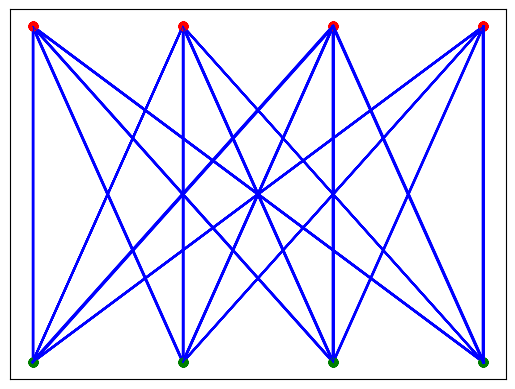

In [10]:
for _ in range(30):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "random",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=random_coeffs())
        trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### Optuna

In [11]:
def objective(trial):
    beta = 0.5

    coeffs = []
    for i in range(4):
        for j in range(4):
            coeffs.append(trial.suggest_float(f"l_{i}_{j}", 0.00001, 1, log=True))
    l_sum = sum(coeffs)
    trial.set_user_attr(f"l_sum", l_sum)
    for i in range(len(coeffs)):
        coeffs[i] /= l_sum
    
    teacher = Base_Model.load_from_checkpoint("./lightning_logs/bov6ycbq/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
    model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs, beta=beta)
    trainer = L.Trainer(max_epochs=100, logger=WandbLogger(), inference_mode=False)
    trainer.fit(model=model, train_dataloaders=train_loader)
    trainer.test(dataloaders=test_loader)
    return model.test_acc

In [12]:
wandb_kwargs = {
            "project": "Oleinik-BS-Thesis-code",
            "entity": "potapuch2001",
            "reinit": True,
        }
wandbc = WeightsAndBiasesCallback(metric_name="test_acc")

/tmp/ipykernel_4515/1253110053.py:6: ExperimentalWarning: WeightsAndBiasesCallback is experimental (supported from v2.9.0). The interface can change in the future.
  wandbc = WeightsAndBiasesCallback(metric_name="test_acc")


[I 2024-06-23 05:10:02,940] A new study created in memory with name: no-name-288434a4-ed5d-4f81-9e81-2f8d2cad37b6
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.26it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.13it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.61it/s] 

[I 2024-06-23 05:14:39,595] Trial 0 finished with value: 0.4835 and parameters: {'l_0_0': 1.2405158535906e-05, 'l_0_1': 0.025504509791833725, 'l_0_2': 3.308224572200784e-05, 'l_0_3': 0.007774584644570674, 'l_1_0': 0.0010864721031495779, 'l_1_1': 0.004531557901729248, 'l_1_2': 1.9720182622631414e-05, 'l_1_3': 1.7647610416328634e-05, 'l_2_0': 0.24995197524352042, 'l_2_1': 1.7478062187660882e-05, 'l_2_2': 0.47176785544516747, 'l_2_3': 2.039939029182473e-05, 'l_3_0': 0.2526583590314904, 'l_3_1': 0.5402313641662941, 'l_3_2': 1.528975488746934e-05, 'l_3_3': 0.022369857835652544}. Best is trial 0 with value: 0.4835.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.26791316270828247
        AUC_Noise           0.36542052030563354
        test_acc            0.48350000381469727
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.56it/s, v_num=uutg]

wandb: WARNING Step only supports monotonically increasing values, use define_metric to set a custom x axis. For details see: https://wandb.me/define-metric
wandb: WARNING (User provided step: 0 is less than current step: 163. Dropping entry: {'l_0_0': 1.2405158535906e-05, 'l_0_1': 0.025504509791833725, 'l_0_2': 3.308224572200784e-05, 'l_0_3': 0.007774584644570674, 'l_1_0': 0.0010864721031495779, 'l_1_1': 0.004531557901729248, 'l_1_2': 1.9720182622631414e-05, 'l_1_3': 1.7647610416328634e-05, 'l_2_0': 0.24995197524352042, 'l_2_1': 1.7478062187660882e-05, 'l_2_2': 0.47176785544516747, 'l_2_3': 2.039939029182473e-05, 'l_3_0': 0.2526583590314904, 'l_3_1': 0.5402313641662941, 'l_3_2': 1.528975488746934e-05, 'l_3_3': 0.022369857835652544, 'test_acc': 0.4835, '_timestamp': 1719108879.5964825}).
wandb: WARNING (User provided step: 1 is less than current step: 326. Dropping entry: {'l_0_0': 0.3776760779893475, 'l_0_1': 0.002865819203483708, 'l_0_2': 0.19124340037350013, 'l_0_3': 0.7139394033710

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.45it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v1.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.39it/s] 

[I 2024-06-23 05:19:14,976] Trial 1 finished with value: 0.5742 and parameters: {'l_0_0': 0.3776760779893475, 'l_0_1': 0.002865819203483708, 'l_0_2': 0.19124340037350013, 'l_0_3': 0.7139394033710896, 'l_1_0': 0.0014598846677216636, 'l_1_1': 0.0004890729676922251, 'l_1_2': 0.0009801693314242601, 'l_1_3': 2.367887114757176e-05, 'l_2_0': 0.16638372638393706, 'l_2_1': 0.761190269083524, 'l_2_2': 0.009217322378465839, 'l_2_3': 0.5675748950381205, 'l_3_0': 0.0013315188647027843, 'l_3_1': 1.2522162339224748e-05, 'l_3_2': 0.00014940320999186826, 'l_3_3': 4.726225466905527e-05}. Best is trial 1 with value: 0.5742.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, ca


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.15233157575130463
        AUC_Noise           0.37221667170524597
        test_acc            0.5741999745368958
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.58it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.47it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v2.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v2.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.53it/s] 

[I 2024-06-23 05:23:52,043] Trial 2 finished with value: 0.595 and parameters: {'l_0_0': 0.00355847203763678, 'l_0_1': 0.0001887833717963402, 'l_0_2': 0.6205633794131997, 'l_0_3': 1.0836228945656246e-05, 'l_1_0': 0.00010709929467880958, 'l_1_1': 0.04043757800786423, 'l_1_2': 0.13655751070838465, 'l_1_3': 0.009542790877271242, 'l_2_0': 0.0010722400611817603, 'l_2_1': 0.0012184789263867636, 'l_2_2': 0.7318371283898251, 'l_2_3': 0.00014013599797161653, 'l_3_0': 0.001740667619908208, 'l_3_1': 0.00032027141655180727, 'l_3_2': 0.05210744782218909, 'l_3_3': 0.22553006399802142}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, c


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21600262820720673
        AUC_Noise            0.431873083114624
        test_acc            0.5950000286102295
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.21it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.12it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v3.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v3.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.27it/s] 

[I 2024-06-23 05:28:24,279] Trial 3 finished with value: 0.5842 and parameters: {'l_0_0': 0.0010355212959501407, 'l_0_1': 0.5234687211951792, 'l_0_2': 6.886507615936732e-05, 'l_0_3': 0.00026812080892280125, 'l_1_0': 0.010752127452642174, 'l_1_1': 0.06918050119328048, 'l_1_2': 0.00013766033729681725, 'l_1_3': 0.47227952959577046, 'l_2_0': 0.002766042671508555, 'l_2_1': 0.0303904942342625, 'l_2_2': 0.00011062720744344924, 'l_2_3': 0.07287034367068353, 'l_3_0': 0.0023972158909064062, 'l_3_1': 7.860063527682122e-05, 'l_3_2': 3.880432785002543e-05, 'l_3_3': 0.350459926491498}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, c


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17393946647644043
        AUC_Noise           0.4308730661869049
        test_acc            0.5842000246047974
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.75it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.63it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v4.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v4.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.76it/s] 

[I 2024-06-23 05:32:57,599] Trial 4 finished with value: 0.5854 and parameters: {'l_0_0': 0.09620682428957845, 'l_0_1': 1.3379336352166171e-05, 'l_0_2': 8.281628064503496e-05, 'l_0_3': 0.007076991955493225, 'l_1_0': 0.08730358156715376, 'l_1_1': 0.004036966106319648, 'l_1_2': 0.0035983374571801224, 'l_1_3': 0.00021257892650230153, 'l_2_0': 2.382447633668015e-05, 'l_2_1': 1.1296524301682893e-05, 'l_2_2': 0.004962759185612788, 'l_2_3': 0.28909279599893506, 'l_3_0': 3.488651597528318e-05, 'l_3_1': 0.00021883302298334256, 'l_3_2': 0.0008915404117205542, 'l_3_3': 0.0017192288842949428}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17892105877399445
        AUC_Noise           0.4022859036922455
        test_acc            0.5853999853134155
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.81it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.70it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v5.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v5.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.43it/s] 

[I 2024-06-23 05:37:36,530] Trial 5 finished with value: 0.5601 and parameters: {'l_0_0': 0.03915840197146564, 'l_0_1': 0.0012650383193218392, 'l_0_2': 0.8553642906572677, 'l_0_3': 0.006859130540776665, 'l_1_0': 0.03395557121992097, 'l_1_1': 5.028449465236722e-05, 'l_1_2': 0.013758125969739715, 'l_1_3': 0.0015875850041813732, 'l_2_0': 0.0007590394410521529, 'l_2_1': 0.02028222480448777, 'l_2_2': 1.0910051101258752e-05, 'l_2_3': 0.17951970203984544, 'l_3_0': 5.8138809965968954e-05, 'l_3_1': 0.10357584003424118, 'l_3_2': 0.0010622519401507955, 'l_3_3': 0.0036883015784823577}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired,


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.14613421261310577
        AUC_Noise           0.38773077726364136
        test_acc            0.5601000189781189
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.27it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.12it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v6.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v6.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.48it/s] 

[I 2024-06-23 05:42:17,528] Trial 6 finished with value: 0.559 and parameters: {'l_0_0': 0.012747751605950007, 'l_0_1': 0.00040006503821292193, 'l_0_2': 0.000508659956717831, 'l_0_3': 0.5383483206417936, 'l_1_0': 0.2594197633131169, 'l_1_1': 0.0007727360369704052, 'l_1_2': 0.0004221737002484562, 'l_1_3': 0.1721558575562417, 'l_2_0': 6.031228942936578e-05, 'l_2_1': 0.008140396822566695, 'l_2_2': 0.38761004117773873, 'l_2_3': 0.0002111451046380521, 'l_3_0': 0.011864880970355336, 'l_3_1': 0.002058414097424651, 'l_3_2': 0.0007678017047348959, 'l_3_3': 0.00017932855413432559}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, c


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.20632632076740265
        AUC_Noise           0.3863910138607025
        test_acc            0.5590000152587891
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.65it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.57it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v7.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v7.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.21it/s] 

[I 2024-06-23 05:46:54,009] Trial 7 finished with value: 0.5744 and parameters: {'l_0_0': 0.0006394001237656698, 'l_0_1': 9.843859459354948e-05, 'l_0_2': 0.00836802142627163, 'l_0_3': 0.1589565693543564, 'l_1_0': 0.00029302728577038247, 'l_1_1': 0.007923955808449156, 'l_1_2': 0.0007770333088462217, 'l_1_3': 0.02043877534226152, 'l_2_0': 3.799524409962908e-05, 'l_2_1': 0.9750854117755966, 'l_2_2': 0.052037129165641426, 'l_2_3': 0.0022873092615118, 'l_3_0': 0.0010613418978054846, 'l_3_1': 4.542921979215621e-05, 'l_3_2': 0.057417044120728684, 'l_3_3': 0.11711232982367888}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, cal


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17851053178310394
        AUC_Noise           0.39922308921813965
        test_acc             0.574400007724762
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 36.25it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 36.04it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v8.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v8.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.73it/s] 

[I 2024-06-23 05:51:35,079] Trial 8 finished with value: 0.5553 and parameters: {'l_0_0': 7.161414857119773e-05, 'l_0_1': 0.0009080112533023616, 'l_0_2': 0.7680415031203615, 'l_0_3': 0.04356637879502116, 'l_1_0': 0.00016413786722356693, 'l_1_1': 0.040751987953841974, 'l_1_2': 2.5491124335514476e-05, 'l_1_3': 3.2002785050721705e-05, 'l_2_0': 0.0004069244285877721, 'l_2_1': 0.009849499534527961, 'l_2_2': 5.1185820172979295e-05, 'l_2_3': 6.887056236604274e-05, 'l_3_0': 0.002109096395912034, 'l_3_1': 0.00591078779692476, 'l_3_2': 6.103917598906e-05, 'l_3_3': 0.036482178541527355}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desir


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.13314209878444672
        AUC_Noise           0.37371280789375305
        test_acc            0.5552999973297119
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:03<00:00, 26.29it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:03<00:00, 26.18it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v9.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v9.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.42it/s] 

[I 2024-06-23 05:56:14,952] Trial 9 finished with value: 0.5559 and parameters: {'l_0_0': 0.192765315971426, 'l_0_1': 0.12759662688831305, 'l_0_2': 0.6120737813587183, 'l_0_3': 0.004932957425331948, 'l_1_0': 0.03667843319566009, 'l_1_1': 0.007766647431375069, 'l_1_2': 5.434471709966791e-05, 'l_1_3': 5.655205715624357e-05, 'l_2_0': 0.0005169100782817017, 'l_2_1': 0.0005226928195326391, 'l_2_2': 0.02911626940939174, 'l_2_3': 0.00397502616089779, 'l_3_0': 0.17072205902169285, 'l_3_1': 0.0014003437413876252, 'l_3_2': 0.0005245422684486459, 'l_3_3': 0.386798085635566}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wan


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2126236855983734
        AUC_Noise           0.37413591146469116
        test_acc             0.555899977684021
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.53it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.41it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v10.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.64it/s] 

[I 2024-06-23 06:00:54,340] Trial 10 finished with value: 0.5904 and parameters: {'l_0_0': 0.005185623452051438, 'l_0_1': 2.5870247111675325e-05, 'l_0_2': 0.02225656840493365, 'l_0_3': 1.0473867029434718e-05, 'l_1_0': 1.0057914874987924e-05, 'l_1_1': 0.9738810677621824, 'l_1_2': 0.6832640107585987, 'l_1_3': 0.006435501242937779, 'l_2_0': 0.023497567903525782, 'l_2_1': 0.0002013282346795772, 'l_2_2': 0.0005737505130980371, 'l_2_3': 0.0008782799130596686, 'l_3_0': 0.04113948803735597, 'l_3_1': 0.018297559979175124, 'l_3_2': 0.16605381594195426, 'l_3_3': 0.8386537771575312}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, c


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1814684271812439
        AUC_Noise           0.40682947635650635
        test_acc             0.590399980545044
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.16it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.03it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v11.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v11.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.36it/s] 

[I 2024-06-23 06:05:37,920] Trial 11 finished with value: 0.589 and parameters: {'l_0_0': 0.005482052234296616, 'l_0_1': 1.0591366894406367e-05, 'l_0_2': 0.039113490992592044, 'l_0_3': 1.0382760641537894e-05, 'l_1_0': 2.8771208406753023e-05, 'l_1_1': 0.5716827668355343, 'l_1_2': 0.8621188300136609, 'l_1_3': 0.010150366140370617, 'l_2_0': 0.02316224689869122, 'l_2_1': 0.000292584718716929, 'l_2_2': 0.0003900092752866841, 'l_2_3': 0.0011041950602918619, 'l_3_0': 0.024527690192598973, 'l_3_1': 0.022553412859521327, 'l_3_2': 0.6902467970903672, 'l_3_3': 0.9708520217207028}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, cal


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19982367753982544
        AUC_Noise           0.43606793880462646
        test_acc            0.5889999866485596
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.23it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.11it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v12.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v12.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.38it/s] 

[I 2024-06-23 06:10:18,251] Trial 12 finished with value: 0.5073 and parameters: {'l_0_0': 0.0007131182135347845, 'l_0_1': 9.023787222710124e-05, 'l_0_2': 0.025525380728133228, 'l_0_3': 1.2517987253193271e-05, 'l_1_0': 1.1745762086368156e-05, 'l_1_1': 0.9726268651406487, 'l_1_2': 0.8271100984218752, 'l_1_3': 0.0013573641909349168, 'l_2_0': 0.02601243729190248, 'l_2_1': 0.0002379742734115661, 'l_2_2': 0.0008283995137597573, 'l_2_3': 0.0003013436685184922, 'l_3_0': 0.0002559550510772641, 'l_3_1': 0.00047495813060388246, 'l_3_2': 0.023515473796916646, 'l_3_3': 0.04541574811474408}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not des


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM             0.129939466714859
        AUC_Noise           0.3051474392414093
        test_acc            0.5073000192642212
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.82it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.71it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v13.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v13.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.24it/s] 

[I 2024-06-23 06:14:56,421] Trial 13 finished with value: 0.5819 and parameters: {'l_0_0': 0.014282000944382298, 'l_0_1': 8.36383956801779e-05, 'l_0_2': 0.0023070393001593074, 'l_0_3': 0.00011091196969413596, 'l_1_0': 6.7097715499554e-05, 'l_1_1': 0.1369598605276693, 'l_1_2': 0.08021389535948782, 'l_1_3': 0.026326021407213233, 'l_2_0': 0.01740854433389756, 'l_2_1': 0.0013953010239821176, 'l_2_2': 0.0011371162695217641, 'l_2_3': 0.00976303167572719, 'l_3_0': 0.03096275013617906, 'l_3_1': 0.04006269008088327, 'l_3_2': 0.2661193421421777, 'l_3_3': 0.005850371930687124}. Best is trial 2 with value: 0.595.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.23156315088272095
        AUC_Noise           0.40005001425743103
        test_acc            0.5819000005722046
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.45it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.34it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v14.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v14.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.80it/s] 

[I 2024-06-23 06:19:31,803] Trial 14 finished with value: 0.6057 and parameters: {'l_0_0': 0.002321489636884291, 'l_0_1': 0.00947523398266864, 'l_0_2': 0.08311338639179651, 'l_0_3': 0.00010259716946351155, 'l_1_0': 1.3824082161652053e-05, 'l_1_1': 0.27789359839916955, 'l_1_2': 0.09758429493731005, 'l_1_3': 0.08599752952387468, 'l_2_0': 0.8984593315962897, 'l_2_1': 7.969510299211637e-05, 'l_2_2': 0.08413284239297064, 'l_2_3': 1.0638723196599872e-05, 'l_3_0': 0.07982177629220247, 'l_3_1': 0.008630927522131222, 'l_3_2': 0.027715247107834486, 'l_3_3': 0.9809347561649056}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, cal


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.20918157696723938
        AUC_Noise           0.43998590111732483
        test_acc            0.6057000160217285
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 32.13it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.97it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v15.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v15.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.66it/s] 

[I 2024-06-23 06:24:11,431] Trial 15 finished with value: 0.4675 and parameters: {'l_0_0': 0.0002737680269834128, 'l_0_1': 0.00992918374603553, 'l_0_2': 0.11418862826805085, 'l_0_3': 0.00017393159989856534, 'l_1_0': 0.0003431065993787277, 'l_1_1': 0.03412330998573214, 'l_1_2': 0.07402388132123637, 'l_1_3': 0.12266989321265989, 'l_2_0': 0.8442645926047045, 'l_2_1': 5.677236545776769e-05, 'l_2_2': 0.13195684773089594, 'l_2_3': 1.08079072870318e-05, 'l_3_0': 0.9110757042305863, 'l_3_1': 0.000530335691026047, 'l_3_2': 0.009210807118588451, 'l_3_3': 0.17542859154069776}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.25656577944755554
        AUC_Noise           0.36752307415008545
        test_acc            0.4675000011920929
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.90it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.76it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v16.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v16.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.52it/s] 

[I 2024-06-23 06:28:49,125] Trial 16 finished with value: 0.5876 and parameters: {'l_0_0': 0.0001448094384879273, 'l_0_1': 0.0160460418533093, 'l_0_2': 0.1270790939340474, 'l_0_3': 0.0007135408430106999, 'l_1_0': 7.574489233901874e-05, 'l_1_1': 0.23525240126103134, 'l_1_2': 0.10495881745176006, 'l_1_3': 0.06429536214218566, 'l_2_0': 0.003158510415102322, 'l_2_1': 0.0021404962012629, 'l_2_2': 0.9600249302096093, 'l_2_3': 3.4242741902450365e-05, 'l_3_0': 0.0002813394917027407, 'l_3_1': 0.005557962775289502, 'l_3_2': 0.006095105351880187, 'l_3_3': 0.06870547542694752}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19404210150241852
        AUC_Noise           0.4070141017436981
        test_acc            0.5875999927520752
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.47it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.39it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v17.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v17.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.16it/s] 

[I 2024-06-23 06:33:24,754] Trial 17 finished with value: 0.5795 and parameters: {'l_0_0': 0.00163225222624502, 'l_0_1': 0.08933783140275697, 'l_0_2': 0.0009598849217609918, 'l_0_3': 5.9955532672967216e-05, 'l_1_0': 0.00395187899085576, 'l_1_1': 0.020624270951526736, 'l_1_2': 0.012255584074644192, 'l_1_3': 0.8969375223456931, 'l_2_0': 0.00011527420757263042, 'l_2_1': 7.099658231091102e-05, 'l_2_2': 0.17476813749447398, 'l_2_3': 9.032136379167592e-05, 'l_3_0': 0.005742576399499335, 'l_3_1': 0.20021496584087206, 'l_3_2': 0.03279289236970426, 'l_3_3': 0.0008844248886876425}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired,


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.19612105190753937
        AUC_Noise           0.4046333432197571
        test_acc            0.5795000195503235
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.79it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 35.68it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v18.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v18.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.90it/s] 

[I 2024-06-23 06:38:02,683] Trial 18 finished with value: 0.1 and parameters: {'l_0_0': 3.212811996635212e-05, 'l_0_1': 0.0003254620234884295, 'l_0_2': 0.2069470786565712, 'l_0_3': 4.918523291103844e-05, 'l_1_0': 0.9723968633923467, 'l_1_1': 1.5052389078328667e-05, 'l_1_2': 0.18580949240081415, 'l_1_3': 0.0004300638361263192, 'l_2_0': 0.0933300643059733, 'l_2_1': 0.11892252154706646, 'l_2_2': 0.022150260073131603, 'l_2_3': 0.00016929655895933464, 'l_3_0': 0.1561598331256079, 'l_3_1': 0.00011270602736849912, 'l_3_2': 0.07611680432542398, 'l_3_3': 0.01164306970208346}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 31.07it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.92it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v19.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v19.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.03it/s] 

[I 2024-06-23 06:42:39,855] Trial 19 finished with value: 0.5853 and parameters: {'l_0_0': 0.055586134171881504, 'l_0_1': 0.003106695350593793, 'l_0_2': 0.007536772691284388, 'l_0_3': 0.0011746000524577524, 'l_1_0': 3.4110038759061285e-05, 'l_1_1': 0.20433667665841906, 'l_1_2': 0.01809370156087145, 'l_1_3': 0.003468119384755431, 'l_2_0': 1.1138646950690083e-05, 'l_2_1': 0.0008527516593415649, 'l_2_2': 0.09519962292288546, 'l_2_3': 0.01982199468670709, 'l_3_0': 0.00034209117757723036, 'l_3_1': 1.1100764487519505e-05, 'l_3_2': 0.8815553455477435, 'l_3_3': 0.0005779769898914919}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not des


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.22268947958946228
        AUC_Noise           0.3958294987678528
        test_acc            0.5853000283241272
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.67it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.54it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v20.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v20.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.95it/s] 

[I 2024-06-23 06:47:18,623] Trial 20 finished with value: 0.5999 and parameters: {'l_0_0': 0.0029526182820403964, 'l_0_1': 0.008076337765603108, 'l_0_2': 0.046355450553815555, 'l_0_3': 3.901505557597081e-05, 'l_1_0': 0.0006916758249340815, 'l_1_1': 0.001107963698330708, 'l_1_2': 0.004311168633733017, 'l_1_3': 0.04748551053890874, 'l_2_0': 0.006694107000317433, 'l_2_1': 8.385253550543106e-05, 'l_2_2': 0.9779521843712538, 'l_2_3': 3.242700142178035e-05, 'l_3_0': 1.2358049431994835e-05, 'l_3_1': 0.0007535373693847579, 'l_3_2': 0.013252113922113659, 'l_3_3': 0.3099828637874347}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desir


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2288578897714615
        AUC_Noise           0.4342128336429596
        test_acc            0.5999000072479248
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.52it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.40it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v21.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v21.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.60it/s] 

[I 2024-06-23 06:51:54,813] Trial 21 finished with value: 0.6014 and parameters: {'l_0_0': 0.0026211089493939454, 'l_0_1': 0.008718313634481369, 'l_0_2': 0.04525644169627351, 'l_0_3': 2.991468041925312e-05, 'l_1_0': 0.0005388957008521042, 'l_1_1': 0.0007794937101623607, 'l_1_2': 0.0036379333877752254, 'l_1_3': 0.042494764430354194, 'l_2_0': 0.9903267500953927, 'l_2_1': 6.02853840533228e-05, 'l_2_2': 0.9212142595058479, 'l_2_3': 1.3037306480834955e-05, 'l_3_0': 1.0088744411238236e-05, 'l_3_1': 0.0011221905373669445, 'l_3_2': 0.012362318764248925, 'l_3_3': 0.20258598073441036}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desi


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.22217895090579987
        AUC_Noise           0.4206564128398895
        test_acc            0.6014000177383423
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.40it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.27it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v22.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v22.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.67it/s] 

[I 2024-06-23 06:56:36,242] Trial 22 finished with value: 0.1 and parameters: {'l_0_0': 0.01670915356520058, 'l_0_1': 0.007115458828459584, 'l_0_2': 0.05996897985332075, 'l_0_3': 4.756758178158884e-05, 'l_1_0': 0.0009700802713319336, 'l_1_1': 0.0007359768645374403, 'l_1_2': 0.0035066606003521035, 'l_1_3': 0.07665504637839837, 'l_2_0': 0.8825109613078566, 'l_2_1': 4.708735754082012e-05, 'l_2_2': 0.2785964069050053, 'l_2_3': 1.1920704138294565e-05, 'l_3_0': 1.1164749806369942e-05, 'l_3_1': 0.0015250499561489438, 'l_3_2': 0.003139150100499462, 'l_3_3': 0.9540494872170275}. Best is trial 14 with value: 0.6057.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, c


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.30it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.18it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v23.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v23.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.06it/s] 

[I 2024-06-23 07:01:11,807] Trial 23 finished with value: 0.607 and parameters: {'l_0_0': 0.0019195658915981528, 'l_0_1': 0.0505382702686135, 'l_0_2': 0.007872165511449696, 'l_0_3': 0.0005352012444860377, 'l_1_0': 0.004151322856440761, 'l_1_1': 0.00025145230185802907, 'l_1_2': 0.030503811442848573, 'l_1_3': 0.29104015510190234, 'l_2_0': 0.3658879308568909, 'l_2_1': 0.0001052449154948322, 'l_2_2': 0.9600158696299107, 'l_2_3': 2.993201386449594e-05, 'l_3_0': 1.0709852763628607e-05, 'l_3_1': 0.008764318153299635, 'l_3_2': 0.01577891050339381, 'l_3_3': 0.13346439930958295}. Best is trial 23 with value: 0.607.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, ca


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.22881051898002625
        AUC_Noise           0.40959101915359497
        test_acc            0.6069999933242798
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.43it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.30it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v24.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v24.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.79it/s] 

[I 2024-06-23 07:05:49,733] Trial 24 finished with value: 0.1 and parameters: {'l_0_0': 0.00030587120076674095, 'l_0_1': 0.060318620293199246, 'l_0_2': 0.009290921140962789, 'l_0_3': 0.0008609804375634843, 'l_1_0': 0.005876286308287182, 'l_1_1': 0.00013439418997824952, 'l_1_2': 0.026847356521856828, 'l_1_3': 0.27773645525089563, 'l_2_0': 0.36749528835860473, 'l_2_1': 2.8799124436132906e-05, 'l_2_2': 0.0663775998799133, 'l_2_3': 3.773934147444424e-05, 'l_3_0': 5.249683373650076e-05, 'l_3_1': 0.00996209330474365, 'l_3_2': 0.002821744802673486, 'l_3_3': 0.09000306965413146}. Best is trial 23 with value: 0.607.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.58it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.47it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v25.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v25.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.52it/s] 

[I 2024-06-23 07:10:28,354] Trial 25 finished with value: 0.5891 and parameters: {'l_0_0': 0.0018496283574662815, 'l_0_1': 0.21461755290577614, 'l_0_2': 0.0030933231507943677, 'l_0_3': 0.00035538666128854645, 'l_1_0': 0.011203146706284813, 'l_1_1': 5.0923262196878026e-05, 'l_1_2': 0.04448351304167418, 'l_1_3': 0.9838476189742041, 'l_2_0': 0.07490052085105539, 'l_2_1': 0.00014231937288205883, 'l_2_2': 0.22037707499005174, 'l_2_3': 0.0004882076605502978, 'l_3_0': 8.512516392845993e-05, 'l_3_1': 0.06943743061591873, 'l_3_2': 0.16531099978727393, 'l_3_3': 0.02614978825704718}. Best is trial 23 with value: 0.607.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired,


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17707368731498718
        AUC_Noise           0.4243718087673187
        test_acc            0.5891000032424927
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.48it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.35it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v26.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v26.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.40it/s] 

[I 2024-06-23 07:15:05,373] Trial 26 finished with value: 0.1 and parameters: {'l_0_0': 0.9568088914507156, 'l_0_1': 0.029996050020337808, 'l_0_2': 0.013226847808357974, 'l_0_3': 0.00283801235617337, 'l_1_0': 0.0022277811676471733, 'l_1_1': 0.00019066155355743764, 'l_1_2': 0.32883846913264864, 'l_1_3': 0.28722906789306657, 'l_2_0': 0.4467011098326721, 'l_2_1': 1.0292881804977535e-05, 'l_2_2': 0.0193092284884978, 'l_2_3': 1.215021392451459e-05, 'l_3_0': 2.2735636625852284e-05, 'l_3_1': 0.003244957250280185, 'l_3_2': 0.01932442602247935, 'l_3_3': 0.012894704953640803}. Best is trial 23 with value: 0.607.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.71it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.61it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v27.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v27.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.38it/s] 

[I 2024-06-23 07:19:42,999] Trial 27 finished with value: 0.6081 and parameters: {'l_0_0': 0.00040501686288688376, 'l_0_1': 0.45807103163981594, 'l_0_2': 0.0010417312723902225, 'l_0_3': 0.00014517350306209175, 'l_1_0': 0.0005169100288421218, 'l_1_1': 0.00209432949442759, 'l_1_2': 0.008973457340313663, 'l_1_3': 0.04053744525676593, 'l_2_0': 0.11201396934916082, 'l_2_1': 0.0004691021338650415, 'l_2_2': 0.35703761951861657, 'l_2_3': 6.07148843258184e-05, 'l_3_0': 0.000161580905043875, 'l_3_1': 0.011243434905970318, 'l_3_2': 0.006199292964464328, 'l_3_3': 0.48303916567583227}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21362105011940002
        AUC_Noise            0.455946147441864
        test_acc            0.6080999970436096
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.83it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.71it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v28.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v28.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.28it/s] 

[I 2024-06-23 07:24:18,053] Trial 28 finished with value: 0.6028 and parameters: {'l_0_0': 0.00031507003188966753, 'l_0_1': 0.7861413776236181, 'l_0_2': 0.000847081060320895, 'l_0_3': 0.0023055163566750867, 'l_1_0': 2.9996224438223278e-05, 'l_1_1': 0.0014166542614324994, 'l_1_2': 0.008216833975914767, 'l_1_3': 0.019653153102088986, 'l_2_0': 0.06472844797543136, 'l_2_1': 0.0004086167628763889, 'l_2_2': 0.04081363544601812, 'l_2_3': 5.567699358592596e-05, 'l_3_0': 0.00014212020085828755, 'l_3_1': 0.016104084115887103, 'l_3_2': 0.004871491817476565, 'l_3_3': 0.555495942341928}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desir


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.18638157844543457
        AUC_Noise           0.44282180070877075
        test_acc            0.6028000116348267
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.65it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.53it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v29.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v29.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.32it/s] 

[I 2024-06-23 07:28:50,731] Trial 29 finished with value: 0.5939 and parameters: {'l_0_0': 3.212552869790618e-05, 'l_0_1': 0.2640576168606941, 'l_0_2': 0.00015378462826881676, 'l_0_3': 0.023381880186462017, 'l_1_0': 0.008813225296673383, 'l_1_1': 0.00023862525284965464, 'l_1_2': 0.0013828404237911734, 'l_1_3': 0.12430868923435637, 'l_2_0': 0.21608900720767227, 'l_2_1': 0.0037454666362395635, 'l_2_2': 0.33715197506771705, 'l_2_3': 3.232110280437277e-05, 'l_3_0': 0.0006236605380538882, 'l_3_1': 0.3714822768577322, 'l_3_2': 0.0017047214063560386, 'l_3_3': 0.10080354857945736}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desire


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2394184172153473
        AUC_Noise           0.4409846067428589
        test_acc            0.5939000248908997
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.01it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.89it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v30.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v30.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.09it/s] 

[I 2024-06-23 07:33:26,682] Trial 30 finished with value: 0.464 and parameters: {'l_0_0': 0.00011552147913299811, 'l_0_1': 0.03988057899873673, 'l_0_2': 1.297664893138127e-05, 'l_0_3': 0.0004083586029713674, 'l_1_0': 0.0020743805871056243, 'l_1_1': 0.001965194002643589, 'l_1_2': 0.0364171260332515, 'l_1_3': 0.4167277164572853, 'l_2_0': 0.1368163491523102, 'l_2_1': 2.955275473185641e-05, 'l_2_2': 0.010406521745021182, 'l_2_3': 7.23720269220614e-05, 'l_3_0': 0.3932059649543628, 'l_3_1': 0.046005729571653095, 'l_3_2': 0.10280016221835858, 'l_3_3': 1.9661094381632687e-05}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, ca


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2553131580352783
        AUC_Noise           0.36907562613487244
        test_acc            0.46399998664855957
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.74it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.62it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v31.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v31.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.45it/s] 

[I 2024-06-23 07:38:01,969] Trial 31 finished with value: 0.5857 and parameters: {'l_0_0': 0.00031078642238322406, 'l_0_1': 0.7429808130689114, 'l_0_2': 0.0005025118256855342, 'l_0_3': 0.0026343803874570373, 'l_1_0': 2.2804081459184478e-05, 'l_1_1': 0.0022894841408736405, 'l_1_2': 0.008178430669660038, 'l_1_3': 0.01936425369989781, 'l_2_0': 0.05928550691838676, 'l_2_1': 0.0003715139186039812, 'l_2_2': 0.04815933423581258, 'l_2_3': 5.476491794119355e-05, 'l_3_0': 0.00013680707024447538, 'l_3_1': 0.9713823427194659, 'l_3_2': 0.005758769064048892, 'l_3_3': 0.5043704349079268}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desire


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2271631509065628
        AUC_Noise           0.43722307682037354
        test_acc            0.5856999754905701
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.23it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.12it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v32.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v32.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.15it/s] 

[I 2024-06-23 07:42:33,315] Trial 32 finished with value: 0.5954 and parameters: {'l_0_0': 0.00054041063833813, 'l_0_1': 0.9711867732893926, 'l_0_2': 0.0012058729824043464, 'l_0_3': 0.0014759008799682769, 'l_1_0': 0.00019939022511749772, 'l_1_1': 0.00724399098443645, 'l_1_2': 0.009469556683596985, 'l_1_3': 0.029029058446105354, 'l_2_0': 0.33250438988284103, 'l_2_1': 0.0006275291106033645, 'l_2_2': 0.12782720850724008, 'l_2_3': 2.086018094932685e-05, 'l_3_0': 0.0001057008931825563, 'l_3_1': 0.016158433753478838, 'l_3_2': 0.00022963684703161856, 'l_3_3': 0.5294164638459355}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.18524736166000366
        AUC_Noise           0.4382205009460449
        test_acc            0.5953999757766724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.21it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.08it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v33.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v33.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.35it/s] 

[I 2024-06-23 07:47:11,447] Trial 33 finished with value: 0.5989 and parameters: {'l_0_0': 0.0014246002059492093, 'l_0_1': 0.24300971099371527, 'l_0_2': 0.0002892581060153588, 'l_0_3': 0.00012023064278613982, 'l_1_0': 4.9844124452467015e-05, 'l_1_1': 0.0003222001894892722, 'l_1_2': 0.23684008620936442, 'l_1_3': 0.012333105869188225, 'l_2_0': 0.1690863155274622, 'l_2_1': 0.00014990223890155684, 'l_2_2': 0.5218355714117499, 'l_2_3': 0.00011505490612496654, 'l_3_0': 0.0006122674090351273, 'l_3_1': 0.007313015875248911, 'l_3_2': 0.005822264712340952, 'l_3_3': 0.15956974945411184}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not des


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21568158268928528
        AUC_Noise           0.43683332204818726
        test_acc            0.5989000201225281
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.28it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.15it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v34.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v34.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 19.16it/s] 

[I 2024-06-23 07:51:47,237] Trial 34 finished with value: 0.5923 and parameters: {'l_0_0': 0.007908557873718773, 'l_0_1': 0.3980352558311019, 'l_0_2': 0.0015791201886958717, 'l_0_3': 0.00043581086752030143, 'l_1_0': 1.7376661618398774e-05, 'l_1_1': 9.298673661977134e-05, 'l_1_2': 0.05170201654712759, 'l_1_3': 0.1221468127296176, 'l_2_0': 0.048063183321464205, 'l_2_1': 0.00011909801779708735, 'l_2_2': 0.002305818309345148, 'l_2_3': 0.0003768604133138724, 'l_3_0': 0.004487397313372839, 'l_3_1': 0.025034869247385932, 'l_3_2': 0.03605488210833472, 'l_3_3': 0.5502701557885453}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.18418946862220764
        AUC_Noise           0.4616679549217224
        test_acc            0.5922999978065491
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.93it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.77it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v35.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v35.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.52it/s] 

[I 2024-06-23 07:56:24,136] Trial 35 finished with value: 0.5716 and parameters: {'l_0_0': 6.47512223864195e-05, 'l_0_1': 0.11837993282874619, 'l_0_2': 0.004194597221723073, 'l_0_3': 0.00020555502661925282, 'l_1_0': 0.00013501789241099384, 'l_1_1': 0.002085076275220605, 'l_1_2': 0.006593230635521254, 'l_1_3': 0.005542272453669144, 'l_2_0': 0.009246525794840936, 'l_2_1': 0.003660520710638641, 'l_2_2': 0.01111261234248664, 'l_2_3': 2.203282621284279e-05, 'l_3_0': 0.06098858477902571, 'l_3_1': 0.0034489682508530356, 'l_3_2': 0.0021082267647372223, 'l_3_3': 0.24562578583089545}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desir


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2248184233903885
        AUC_Noise           0.44900384545326233
        test_acc            0.5716000199317932
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.84it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.72it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v36.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v36.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.02it/s] 

[I 2024-06-23 08:00:57,485] Trial 36 finished with value: 0.1 and parameters: {'l_0_0': 1.2091483611042036e-05, 'l_0_1': 0.05858951040435377, 'l_0_2': 0.0006046555858601052, 'l_0_3': 0.0019833107360510585, 'l_1_0': 0.0013090075742043842, 'l_1_1': 0.003914914350743519, 'l_1_2': 0.023435876433411107, 'l_1_3': 0.21251284840168794, 'l_2_0': 0.49141750639605575, 'l_2_1': 2.419641504936592e-05, 'l_2_2': 0.4469197098838264, 'l_2_3': 0.00013396602220984462, 'l_3_0': 2.5092431710624666e-05, 'l_3_1': 0.011515066006065998, 'l_3_2': 0.006819266879876582, 'l_3_3': 0.059137785744135085}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desire


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.10000000149011612
        AUC_Noise           0.10000000149011612
        test_acc            0.10000000149011612
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.44it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.31it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v37.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v37.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.71it/s]  

[I 2024-06-23 08:05:34,558] Trial 37 finished with value: 0.5921 and parameters: {'l_0_0': 0.0007719504953189451, 'l_0_1': 0.4612495693139121, 'l_0_2': 0.00018355443853776833, 'l_0_3': 0.025193481173724438, 'l_1_0': 0.022817227718134613, 'l_1_1': 0.013845243577340734, 'l_1_2': 0.0016081270859151227, 'l_1_3': 0.07674667519116092, 'l_2_0': 0.11480917988640245, 'l_2_1': 0.0011182701028672054, 'l_2_2': 0.004222193567171281, 'l_2_3': 5.503004437732559e-05, 'l_3_0': 0.011943385005329477, 'l_3_1': 0.148263117993224, 'l_3_2': 0.0003603059093083652, 'l_3_3': 0.335522000042336}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, ca


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.20479737222194672
        AUC_Noise           0.4487076997756958
        test_acc            0.5921000242233276
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.67it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.52it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v38.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v38.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.78it/s] 

[I 2024-06-23 08:10:14,312] Trial 38 finished with value: 0.5637 and parameters: {'l_0_0': 0.00017911465174447482, 'l_0_1': 0.0190695043341787, 'l_0_2': 3.845911031617159e-05, 'l_0_3': 0.0005674038206406181, 'l_1_0': 0.0004234098106241973, 'l_1_1': 0.00036680427937377084, 'l_1_2': 0.0005062000921041029, 'l_1_3': 0.564156492114403, 'l_2_0': 0.04408506822571344, 'l_2_1': 0.00047509027486113456, 'l_2_2': 0.03957653036732561, 'l_2_3': 2.03050145391021e-05, 'l_3_0': 0.0008665631347750643, 'l_3_1': 0.0362999099935583, 'l_3_2': 0.016582758692098243, 'l_3_3': 0.018840212110584478}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desire


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.16367632150650024
        AUC_Noise           0.41184744238853455
        test_acc            0.5637000203132629
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.25it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 30.10it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v39.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v39.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.72it/s] 

[I 2024-06-23 08:14:56,518] Trial 39 finished with value: 0.5606 and parameters: {'l_0_0': 0.000388409419277816, 'l_0_1': 0.0020022632190930677, 'l_0_2': 0.005425777732711961, 'l_0_3': 0.00011220254926384947, 'l_1_0': 4.9798171687855156e-05, 'l_1_1': 0.0014316065321559191, 'l_1_2': 0.00019553404937436032, 'l_1_3': 0.0018350467308278946, 'l_2_0': 0.2559160935497926, 'l_2_1': 0.33488965579758556, 'l_2_2': 0.08278905322842073, 'l_2_3': 0.04642110784128441, 'l_3_0': 3.608236079919751e-05, 'l_3_1': 0.002567204810061441, 'l_3_2': 0.0010454710800861231, 'l_3_3': 0.00011589086302809177}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.17064736783504486
        AUC_Noise           0.38316410779953003
        test_acc            0.5605999827384949
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.08it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.95it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v40.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v40.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.44it/s] 

[I 2024-06-23 08:19:35,863] Trial 40 finished with value: 0.6063 and parameters: {'l_0_0': 0.0012957108184685636, 'l_0_1': 0.21604333832026368, 'l_0_2': 0.25672030242833654, 'l_0_3': 0.014109071380832026, 'l_1_0': 0.0038421451333999616, 'l_1_1': 1.3949703962666571e-05, 'l_1_2': 0.38160774463667774, 'l_1_3': 0.015351766815714832, 'l_2_0': 0.008690092298543003, 'l_2_1': 0.000266998383572024, 'l_2_2': 0.19044158546079454, 'l_2_3': 0.0001847253156978156, 'l_3_0': 0.002831502918977422, 'l_3_1': 0.08006279607595525, 'l_3_2': 0.03738507091958116, 'l_3_3': 0.5548893406255159}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, ca


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21124210953712463
        AUC_Noise           0.4476897418498993
        test_acc            0.6062999963760376
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.99it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.90it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v41.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v41.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.21it/s] 

[I 2024-06-23 08:24:16,418] Trial 41 finished with value: 0.6059 and parameters: {'l_0_0': 0.001258215254713197, 'l_0_1': 0.15821321152712328, 'l_0_2': 0.3256469213347026, 'l_0_3': 0.013404647284053313, 'l_1_0': 0.003897102508630954, 'l_1_1': 1.563476532823876e-05, 'l_1_2': 0.4005615979101699, 'l_1_3': 0.015580247394581324, 'l_2_0': 0.007904205167935661, 'l_2_1': 0.00029603674643621276, 'l_2_2': 0.2013843292889867, 'l_2_3': 0.0002163830098207023, 'l_3_0': 0.010927268178343405, 'l_3_1': 0.06917618482160451, 'l_3_2': 0.04057334072108307, 'l_3_3': 0.5995872670210194}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21282631158828735
        AUC_Noise           0.4563961625099182
        test_acc             0.60589998960495
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.79it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.68it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v42.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v42.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.78it/s] 

[I 2024-06-23 08:28:55,105] Trial 42 finished with value: 0.6001 and parameters: {'l_0_0': 0.0010634753062292066, 'l_0_1': 0.17894588666739178, 'l_0_2': 0.3336164420379842, 'l_0_3': 0.014092413984179967, 'l_1_0': 0.0038425093837663377, 'l_1_1': 1.3626579328239623e-05, 'l_1_2': 0.367353813306354, 'l_1_3': 0.013039763935209732, 'l_2_0': 0.0020981129455810306, 'l_2_1': 0.0001299224576705023, 'l_2_2': 0.5500757959652114, 'l_2_3': 0.00022654677356838564, 'l_3_0': 0.07689178082051053, 'l_3_1': 0.10725265883607205, 'l_3_2': 0.04865616672083115, 'l_3_3': 0.13392435189864815}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, cal


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.24437367916107178
        AUC_Noise           0.4278179407119751
        test_acc            0.6000999808311462
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.10it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.03it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v43.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v43.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.79it/s] 

[I 2024-06-23 08:33:29,352] Trial 43 finished with value: 0.6028 and parameters: {'l_0_0': 0.004079963347099292, 'l_0_1': 0.06301420764466267, 'l_0_2': 0.4013933552700977, 'l_0_3': 0.09066960154419833, 'l_1_0': 0.0170221983101176, 'l_1_1': 2.8001172654175623e-05, 'l_1_2': 0.15218321168684398, 'l_1_3': 0.04494017542739987, 'l_2_0': 0.008054196615696483, 'l_2_1': 0.00023746125670117866, 'l_2_2': 0.2134135956998289, 'l_2_3': 0.0008514404785603775, 'l_3_0': 0.0033969747258523115, 'l_3_1': 0.05137599024469885, 'l_3_2': 0.3155728682254667, 'l_3_3': 0.6409672738157575}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wa


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21398158371448517
        AUC_Noise           0.46308332681655884
        test_acc            0.6028000116348267
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.63it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 29.48it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v44.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v44.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 15.22it/s] 

[I 2024-06-23 08:38:10,366] Trial 44 finished with value: 0.6019 and parameters: {'l_0_0': 0.00946237568076909, 'l_0_1': 0.3319146704152157, 'l_0_2': 0.10298941752050551, 'l_0_3': 0.00505362741182583, 'l_1_0': 0.07729620019278996, 'l_1_1': 3.0938091855369625e-05, 'l_1_2': 0.4539462321045543, 'l_1_3': 0.006454975375201131, 'l_2_0': 0.0011497729052876832, 'l_2_1': 0.0019139753316297233, 'l_2_2': 0.2782495666011067, 'l_2_3': 0.0019333359324203631, 'l_3_0': 0.006745527820503623, 'l_3_1': 0.08620578711693362, 'l_3_2': 0.026534410313008766, 'l_3_3': 0.2615142280185046}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `w


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.21526052057743073
        AUC_Noise            0.432115375995636
        test_acc            0.6018999814987183
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.51it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 28.38it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v45.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v45.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 17.45it/s] 

[I 2024-06-23 08:42:49,334] Trial 45 finished with value: 0.6036 and parameters: {'l_0_0': 0.002591936350160741, 'l_0_1': 0.03666372256780081, 'l_0_2': 0.34006636802448625, 'l_0_3': 0.013391175047353526, 'l_1_0': 0.0020559818157415495, 'l_1_1': 1.092980116999255e-05, 'l_1_2': 0.12052788030587588, 'l_1_3': 0.002745460679945355, 'l_2_0': 0.00022149394356981388, 'l_2_1': 1.837273130767519e-05, 'l_2_2': 0.5477736759955092, 'l_2_3': 0.0004265386939485959, 'l_3_0': 0.01533390915689194, 'l_3_1': 0.20195135719626808, 'l_3_2': 0.10622240727222132, 'l_3_3': 0.8847543232947592}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, cal


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.2452736794948578
        AUC_Noise           0.4385615289211273
        test_acc             0.603600025177002
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 37.39it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 37.26it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v46.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v46.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 16.28it/s] 

[I 2024-06-23 08:47:26,395] Trial 46 finished with value: 0.57 and parameters: {'l_0_0': 0.02174013446671042, 'l_0_1': 0.12483049419507869, 'l_0_2': 0.18707596110922858, 'l_0_3': 0.08126538276819967, 'l_1_0': 0.006162737265889751, 'l_1_1': 4.769554870023572e-05, 'l_1_2': 0.5279356209756568, 'l_1_3': 0.0007035161867954832, 'l_2_0': 0.005172503280662415, 'l_2_1': 0.0008359177664993743, 'l_2_2': 0.12529304272372882, 'l_2_3': 0.00013366339930614838, 'l_3_0': 0.08679196043358907, 'l_3_1': 0.33610805418498557, 'l_3_2': 0.058428153633318686, 'l_3_3': 0.2848064668444638}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `w


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.23078946769237518
        AUC_Noise           0.42398589849472046
        test_acc            0.5699999928474426
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.34it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.22it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v47.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v47.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.51it/s] 

[I 2024-06-23 08:52:04,305] Trial 47 finished with value: 0.6032 and parameters: {'l_0_0': 0.0011961314932205423, 'l_0_1': 0.016303724853206056, 'l_0_2': 0.016387751235151803, 'l_0_3': 2.0723130040872508e-05, 'l_1_0': 0.05204781106529604, 'l_1_1': 0.00010391468283811921, 'l_1_2': 0.24369178256762009, 'l_1_3': 0.1587394569454726, 'l_2_0': 0.01388184567862286, 'l_2_1': 0.007605098232885347, 'l_2_2': 1.974094741449288e-05, 'l_2_3': 0.5216058099406823, 'l_3_0': 0.0016679085045195772, 'l_3_1': 0.006421654188234255, 'l_3_2': 0.010019225512154692, 'l_3_3': 0.45343136834572273}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.1960473656654358
        AUC_Noise           0.4639076888561249
        test_acc            0.6032000184059143
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.95it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 27.82it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v48.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v48.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:05<00:00, 14.97it/s] 

[I 2024-06-23 08:56:43,339] Trial 48 finished with value: 0.5982 and parameters: {'l_0_0': 0.0061627375040926085, 'l_0_1': 0.004224647776082227, 'l_0_2': 0.0813990317704736, 'l_0_3': 0.28136537192643746, 'l_1_0': 0.0008922815554264534, 'l_1_1': 2.293436347153275e-05, 'l_1_2': 0.06971058843792063, 'l_1_3': 0.03255550351446936, 'l_2_0': 0.5649988676924166, 'l_2_1': 4.614533398295732e-05, 'l_2_2': 0.18394603252867045, 'l_2_3': 0.003868160597909053, 'l_3_0': 0.018027962586756652, 'l_3_1': 0.028072091390936197, 'l_3_2': 0.038055685627076216, 'l_3_3': 0.13037597803722628}. Best is trial 27 with value: 0.6081.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM             0.206510528922081
        AUC_Noise           0.4079897403717041
        test_acc            0.5982000231742859
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.96it/s, v_num=uutg]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 79/79 [00:02<00:00, 26.84it/s, v_num=uutg]


/home/ganddalf/anaconda3/envs/dl/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v49.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/q73fuutg/checkpoints/epoch=99-step=7900-v49.ckpt


Testing DataLoader 0: 100%|██████████| 79/79 [00:04<00:00, 18.83it/s] 

[I 2024-06-23 09:01:19,991] Trial 49 finished with value: 0.5209 and parameters: {'l_0_0': 0.0005580541886736031, 'l_0_1': 0.08278380832407888, 'l_0_2': 0.9664659217031505, 'l_0_3': 0.01140873425685202, 'l_1_0': 0.01763249927320897, 'l_1_1': 6.915036445888834e-05, 'l_1_2': 0.9175928439229596, 'l_1_3': 0.07429196995904574, 'l_2_0': 0.0017793868027445787, 'l_2_1': 9.314295191102208e-05, 'l_2_2': 0.00026389399816738627, 'l_2_3': 0.000603393702895062, 'l_3_0': 0.4068357279749403, 'l_3_1': 0.00419376021256199, 'l_3_2': 1.1444121022522486e-05, 'l_3_3': 0.06299259348963411}. Best is trial 27 with value: 0.6081.



────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        AUC_FGSM            0.20577631890773773
        AUC_Noise           0.3640551269054413
        test_acc            0.5209000110626221
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


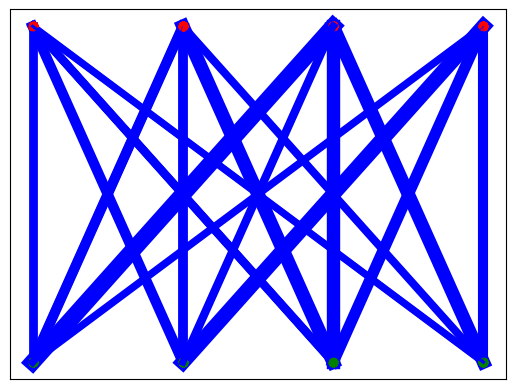

In [13]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, callbacks=[wandbc])

In [14]:
f = "best_{}".format
for param_name, param_value in study.best_trial.params.items():
    wandb.run.summary[f(param_name)] = param_value

wandb.run.summary["best accuracy"] = study.best_trial.value

wandb.log(
    {
        "optuna_optimization_history": optuna.visualization.plot_optimization_history(
            study
        ),
        "optuna_param_importances": optuna.visualization.plot_param_importances(
            study
        ),
    }
)

wandb.finish()

AUC_FGSM,█▃▆▄▃▅▄▂▄▅▂▆█▅▅▁▆▆▁▆▄▁▆▅▇▆▅▆▆▁▅▄▆▆▇▆▇▆▅▅
AUC_Noise,▆▆▇▇▇▇▇▆▇▇▅▇▆▇▇▁▇▇▁▇▇▁██▆▇█▇█▁█▇██▇██▇█▆
epoch,▄▅▇▁▃▄▆▃▄▆▇▁▃█▂▃▅▆█▂▆█▂▄▅▇▄▅▇▁▃▄▆▃▄▆▇▂▃█
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,▆███▇▇█▇██▇█▆██▁██▁██▁██▆███▇▁█▇█████▇█▇
train_acc,▄█▇▅▆▇▇█▆▇█▆▄▇▆▄▆▇▆▁▇▁▇▅▄▇▆▇▆▂▅▆▇▅▆▇▇▆▆▅
train_loss,▅▂▁▃▁▃▂▁▁▁▁▅█▁▁▂▁▆▃ ▁ ▂▃▅▂▂▁▂ ▂▆▁▂▁▂▁▂▆▂
trainer/global_step,▄▅▇▁▃▄▆▃▄▆▇▁▃█▂▃▅▆█▂▆█▂▄▅▇▄▅▇▁▃▄▆▃▄▆▇▂▃█
AUC_FGSM,0.20578
AUC_Noise,0.36406
best accuracy,0.6081
